# Gauss-newton methods in solving non-linear regression

## Hypothesis

https://en.wikipedia.org/wiki/Gauss–Newton_algorithm

## Implementation

Round 0: RMSE 52434.65783143754
Round 1: RMSE 0.00948395640407159
Round 2: RMSE 3.3763969158393603e-12
RMSE error sastify predefined condition. Fit terminated.
Original function: 2 * sin(x) + 1 * (x)
Predict function: 1.9999999999999996 * sin(x) + 0.9999999999999999 * (x)


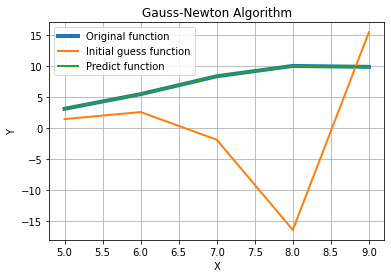

In [57]:
from typing import Callable
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt


################ CONSTANT ###################
COEFFICIENTS = [2, 1]
MAX_INTER = 100
RMSE_MIN: float = 10 ** (-6)


############## TARGET FUNCTION ###############
def fit_function(x, coeff):
    return coeff[0] * np.sin(x) + coeff[1] * x


################ SUPPORT FUNCTIONS ###################

def compute_lost_func(coefficients: np.ndarray):
    """
    Calculate the different between target value and predicted value (h(x) - y)
    """
    y_fit = fit_function(x, coefficients)
    return y_fit - y

def compute_jacobian_matrix(matrix: np.ndarray, 
                            step: float = 10 ** (-8)):
    """
    Compute the jacobian matrix by numerical calculation
    """
    y0 = compute_lost_func(matrix)

    jacobian_matrix = []
    for i, parameter in enumerate(matrix):
        jac_x = matrix.copy()
        jac_x[i] += step
        y = compute_lost_func(jac_x)
        derivative = (y - y0) / step
        jacobian_matrix.append(derivative)
    jacobian_matrix = np.array(jacobian_matrix).T

    return jacobian_matrix

def compute_pseudoinverse(x: np.ndarray):
    """
    Calculate the pseudo inverse matrix or Moore–Penrose inverse matrix (https://en.wikipedia.org/wiki/Moore–Penrose_inverse)
    """
    return pinv(x.T @ x) @ x.T


################ GAUSS-NEWTON ALGORITHM ###############
def gauss_newton_algorithm(x: np.array, y: np.array, init_guess: np.array = None):
    """
    The main function which illustrates the Gauss-Newton algorithm. The psuedocode of the below function is:
        For the number of loop smaller than max iteration
            Calculate the difference between the lastest prediction and target Y
            Calculate the jacobian matrix of current coefficient
            Update the coefficent with gauss_newton_algorithm
            If the new RMSE smaller than a predefined value
                return coefficient
                
    :param x: Features
    :param y: Target variable
    :param init_guess: 
    """
    coefficient = init_guess
    rmse_prev = np.inf
    
    for k in range(MAX_INTER):
        r = compute_lost_func(coefficient)
        jacobian_matrix = compute_jacobian_matrix(coefficient, step=10 ** (-6))
        
        coefficient = coefficient - compute_pseudoinverse(jacobian_matrix) @ r
        
        rmse = np.sqrt(np.sum(r ** 2))
        print(f"Round {k}: RMSE {rmse}")
        if rmse < RMSE_MIN:
            print("RMSE error sastify predefined condition. Fit terminated.")
            return coefficient
        rmse_prev = rmse
    print("Max number of iterations reached. ")

    return coefficient

if __name__ == "__main__":
    #Generate fit function
    x = np.arange(5, 10)
    y = fit_function(x, COEFFICIENTS)
    # Generate innitial guess function
    yn = y * np.random.randn(len(x))
    init_guess = 10000 * np.random.random(len(COEFFICIENTS))
    # Compute result 
    result = gauss_newton_algorithm(x, yn, init_guess)
    predict_func = fit_function(x, result)
    print(f"Original function: {COEFFICIENTS[0]} * sin(x) + {COEFFICIENTS[1]} * (x)")
    print(f"Predict function: {result[0]} * sin(x) + {result[1]} * (x)")
    # Visualization
    plt.figure()
    plt.plot(x, y, label="Original function", linewidth=4)
    plt.plot(x, yn, label="Initial guess function", linewidth=2)
    plt.plot(x, predict_func, label="Predict function", linewidth=2)
    plt.title("Gauss-Newton Algorithm")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.legend()
    plt.show()